In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
train = pd.read_csv("/kaggle/input/equity-post-HCT-survival-predictions/train.csv")
test = pd.read_csv("/kaggle/input/equity-post-HCT-survival-predictions/test.csv")
    
train.sample(20)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
22960,22960,Intermediate,No,Poor,No,1.0,4.0,TBI + Cy +- Other,No,NaN,...,NaN,Related,"N/A, Mel not given",NaN,No,1.0,Yes,NaN,0.0,77.585
20444,20444,N/A - non-malignant indication,NaN,NaN,NaN,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,NaN,2.0,NaN,10.0,0.0,24.717
22826,22826,TBD cytogenetics,No,NaN,No,2.0,8.0,No TBI,No,4.0,...,NaN,Unrelated,"N/A, Mel not given",6.0,No,2.0,No,8.0,1.0,4.526
3720,3720,High,No,Poor,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,Yes,2.0,No,10.0,1.0,4.673
5234,5234,High,No,Poor,No,1.0,6.0,No TBI,No,5.0,...,NaN,Unrelated,MEL,7.0,No,2.0,No,9.0,1.0,2.780
22164,22164,High,NaN,Intermediate,Yes,1.0,4.0,TBI + Cy +- Other,No,3.0,...,NaN,Related,"N/A, Mel not given",4.0,No,1.0,Yes,5.0,1.0,4.174
1138,1138,High - TED AML case <missing cytogenetics,No,Other,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,1.0,2.808
25411,25411,High,No,Poor,No,2.0,8.0,TBI + Cy +- Other,No,5.0,...,NaN,Unrelated,"N/A, Mel not given",7.0,No,2.0,No,9.0,0.0,24.457
2235,2235,N/A - pediatric,No,NaN,No,2.0,7.0,No TBI,No,5.0,...,Permissive mismatched,Unrelated,"N/A, Mel not given",7.0,No,1.0,No,9.0,0.0,24.111
12921,12921,Low,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Unrelated,MEL,8.0,No,2.0,Yes,10.0,0.0,43.282


# Explorative Datenanalyse (EDA)

### Überblick der NaN Werte in Train und Test

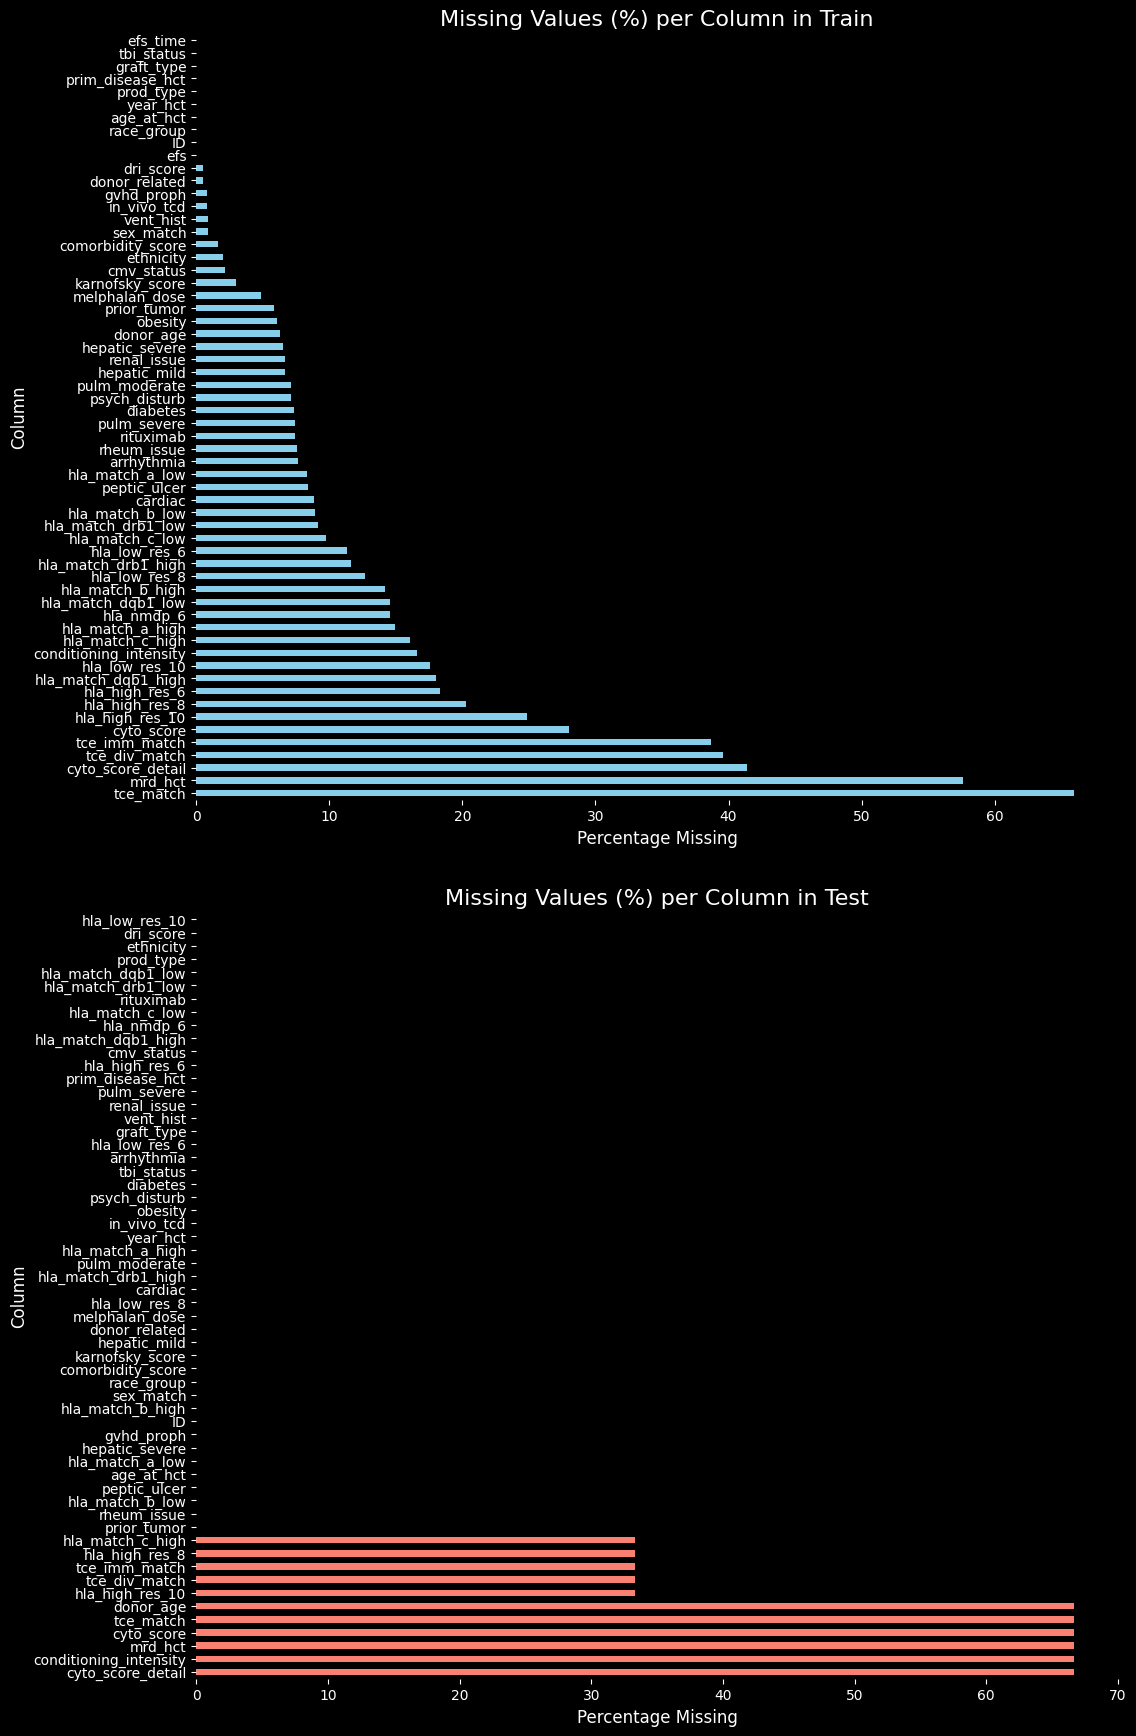

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use dark background style
plt.style.use('dark_background')

# Calculate missing value percentages for train and test
missing_train = train.isnull().mean() * 100
missing_train = missing_train.sort_values(ascending=False)

missing_test = test.isnull().mean() * 100
missing_test = missing_test.sort_values(ascending=False)

# Create subplots stacked vertically with dark background
fig, axs = plt.subplots(2, 1, figsize=(12, 18), facecolor='black')

# Plot for Train data
missing_train.plot(kind='barh', ax=axs[0], color='skyblue')
axs[0].set_title('Missing Values (%) per Column in Train', color='white', fontsize=16)
axs[0].set_xlabel('Percentage Missing', color='white', fontsize=12)
axs[0].set_ylabel('Column', color='white', fontsize=12)
axs[0].tick_params(axis='both', colors='white')
for spine in axs[0].spines.values():
    spine.set_visible(False)

# Plot for Test data
missing_test.plot(kind='barh', ax=axs[1], color='salmon')
axs[1].set_title('Missing Values (%) per Column in Test', color='white', fontsize=16)
axs[1].set_xlabel('Percentage Missing', color='white', fontsize=12)
axs[1].set_ylabel('Column', color='white', fontsize=12)
axs[1].tick_params(axis='both', colors='white')
for spine in axs[1].spines.values():
    spine.set_visible(False)

plt.tight_layout(pad=3.0)
plt.show()

### Dieses Diagramm vergleicht die Altersverteilung von Spendern und Patienten bei der hämatopoetischen Stammzelltransplantation.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


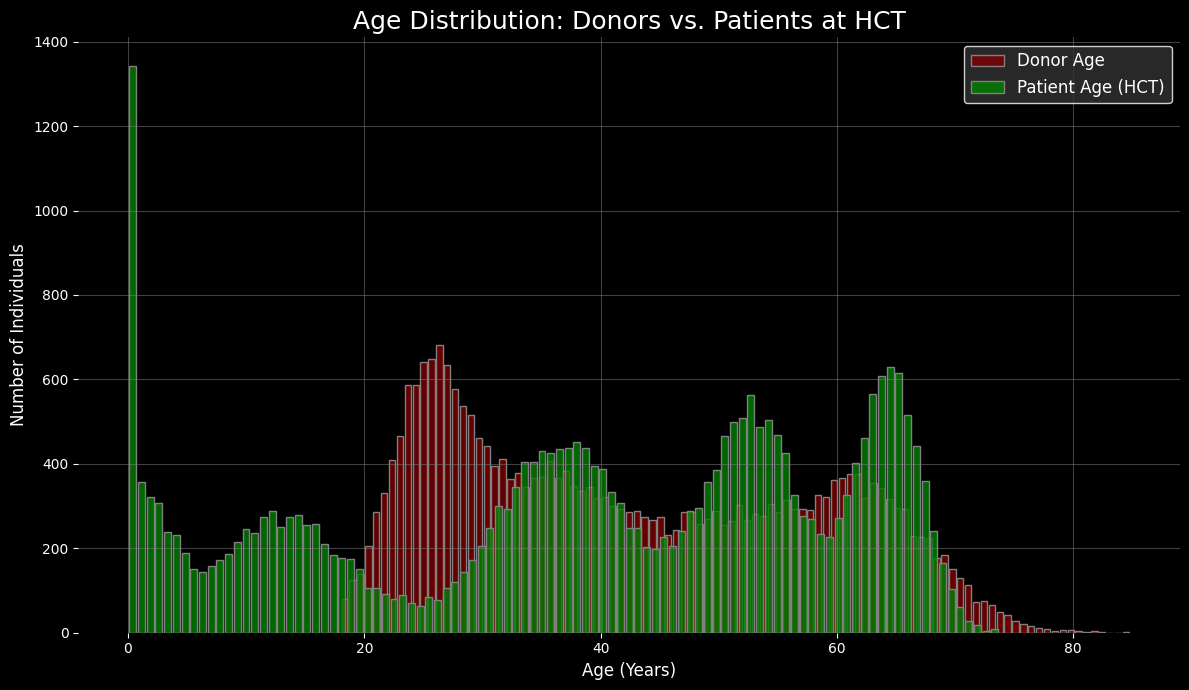

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up plot style
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 7), facecolor='black')
ax.set_facecolor('black')

# Prepare data
data_donor = train["donor_age"].dropna()
data_patient = train["age_at_hct"].dropna()

# Create common bins
max_age = max(data_donor.max(), data_patient.max())
bins = np.linspace(0, max_age, 15)  # Adjust bin count for better visualization

# Plot using seaborn histplot
sns.histplot(data=data_donor, bins=100, color='maroon', 
             edgecolor='grey', linewidth=1, alpha=0.8,
             label='Donor Age', kde=False,
             element='bars', discrete=False)

sns.histplot(data=data_patient, bins=100, color='green', 
             edgecolor='grey', linewidth=1, alpha=0.8,
             label='Patient Age (HCT)', kde=False,
             element='bars', discrete=False)

# Manual bar spacing adjustment
for patch in ax.patches:
    current_width = patch.get_width()
    patch.set_width(current_width * 0.8)  # Reduce bar width
    patch.set_x(patch.get_x() + current_width * 0.1)  # Center bars

# Styling
ax.set_xlabel("Age (Years)", color='white', fontsize=12)
ax.set_ylabel("Number of Individuals", color='white', fontsize=12)
ax.set_title("Age Distribution: Donors vs. Patients at HCT", color='white', fontsize=18)

# Customize grid and ticks
ax.grid(color='gray', linestyle='-', alpha=0.5)
ax.tick_params(axis='both', colors='white')

# Remove frame spines
for spine in ax.spines.values():
    spine.set_visible(False)

# Legend
ax.legend(facecolor='#333333', edgecolor='white', 
          labelcolor='white', fontsize=12)

plt.tight_layout()
plt.show()

### Verteilung der verschiedenen ethnischen Gruppen in einem Kreisdiagramm.

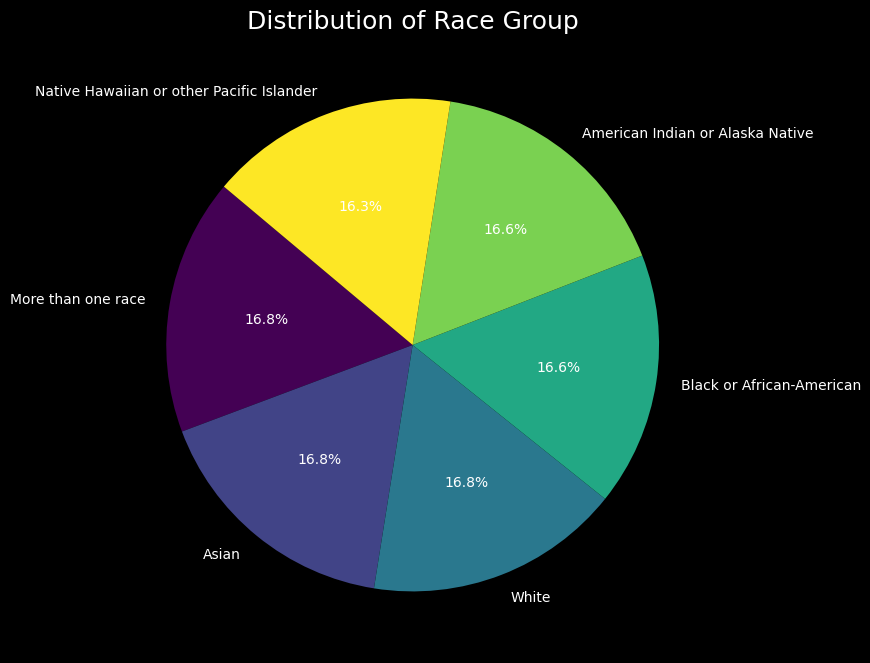

In [17]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('dark_background')

# Count the occurrences of each race group
race_counts = train['race_group'].value_counts()

# Use the "viridis" colormap to generate a vibrant set of colors
colors = plt.cm.viridis(np.linspace(0, 1, len(race_counts)))

plt.figure(figsize=(8,8), facecolor='black')
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Race Group', color='white', fontsize=18)
plt.show()

### Verteilung der Transplantattypen in einem Donut Diagramm.

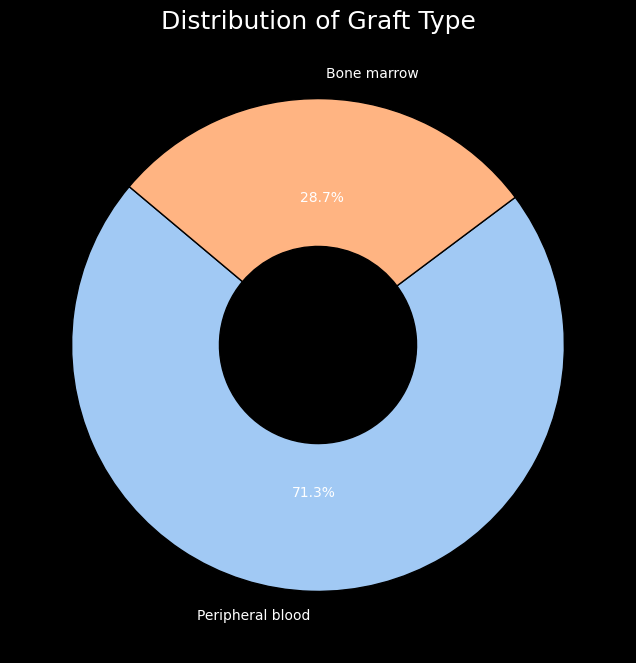

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('dark_background')

# Count the occurrences of each graft type
graft_counts = train['graft_type'].value_counts()

# Create calm pastel colors using seaborn's pastel palette
calm_colors = sns.color_palette("pastel", len(graft_counts))

fig, ax = plt.subplots(figsize=(8,8), facecolor='black')
ax.set_facecolor('black')

# Create donut chart (pie chart with a hole in the center)
wedges, texts, autotexts = ax.pie(
    graft_counts, 
    labels=graft_counts.index,
    autopct='%1.1f%%', 
    startangle=140,
    colors=calm_colors,
    wedgeprops=dict(width=0.6, edgecolor='black')
)

ax.set_title('Distribution of Graft Type', color='white', fontsize=18)

# Set the text colors for readability
for text in texts:
    text.set_color('white')
for autotext in autotexts:
    autotext.set_color('white')

plt.show()

### Veranschaulichung der Verteilung der ereignisfreien Überlebenszeit.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


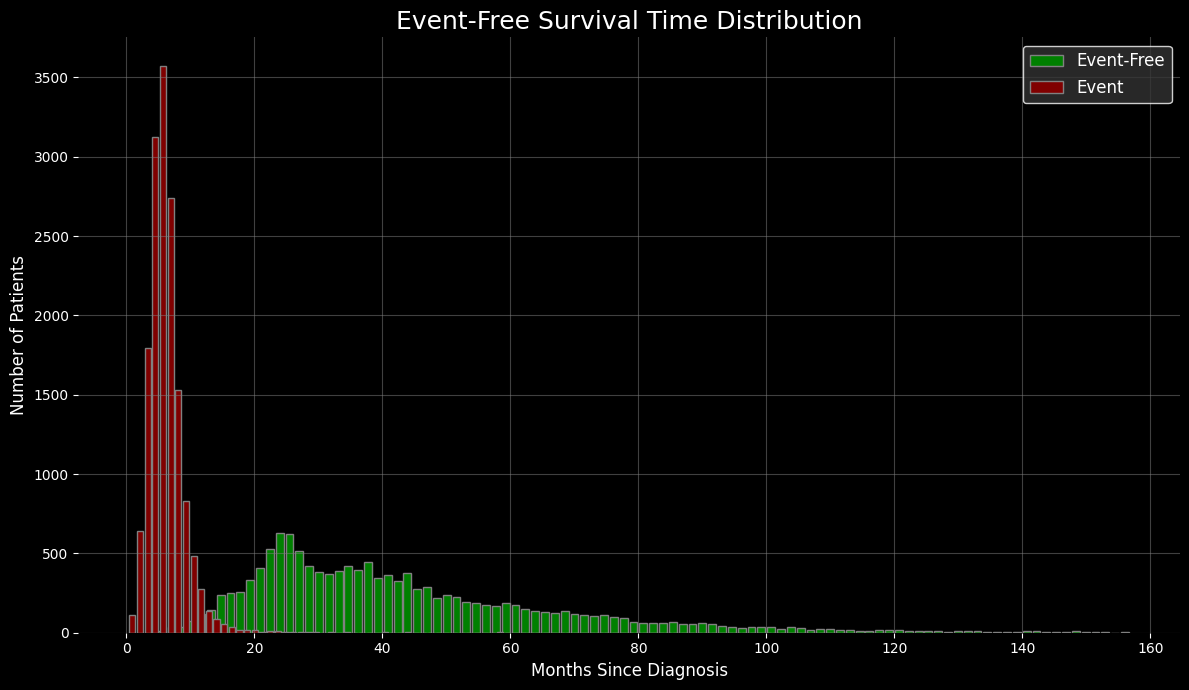

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up plot style
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 7), facecolor='black')
ax.set_facecolor('black')

# Prepare data
data_efs1 = train.loc[train.efs == 1, "efs_time"]
data_efs0 = train.loc[train.efs == 0, "efs_time"]

# Create common bins
max_time = max(data_efs1.max(), data_efs0.max())
bins = np.linspace(0, max_time, 12)  # Fewer bins for clearer bars

# Plot using seaborn histplot
sns.histplot(data=data_efs0, bins=100, color='green', 
             edgecolor='grey', linewidth=1, alpha=1,
             label='Event-Free', kde=False,
             element='bars', discrete=False)

sns.histplot(data=data_efs1, bins=100, color='maroon', 
             edgecolor='grey', linewidth=1, alpha=1,
             label='Event', kde=False,
             element='bars', discrete=False)

# Manual bar spacing adjustment
for patch in ax.patches:
    current_width = patch.get_width()
    patch.set_width(current_width * 0.8)  # Reduce bar width
    patch.set_x(patch.get_x() + current_width * 0.1)  # Center bars

# Styling
ax.set_xlabel("Months Since Diagnosis", color='white', fontsize=12)
ax.set_ylabel("Number of Patients", color='white', fontsize=12)
ax.set_title("Event-Free Survival Time Distribution", color='white', fontsize=18)

# Customize grid and ticks
ax.grid(color='gray', linestyle='-', alpha=0.5)
ax.tick_params(axis='both', colors='white')

# Remove frame spines
for spine in ax.spines.values():
    spine.set_visible(False)

# Legend
ax.legend(facecolor='#333333', edgecolor='white', 
          labelcolor='white', fontsize=12)

plt.tight_layout()
plt.show()


### Wie viele hämatopoetische Stammzelltransplantation gibt es pro Jahr

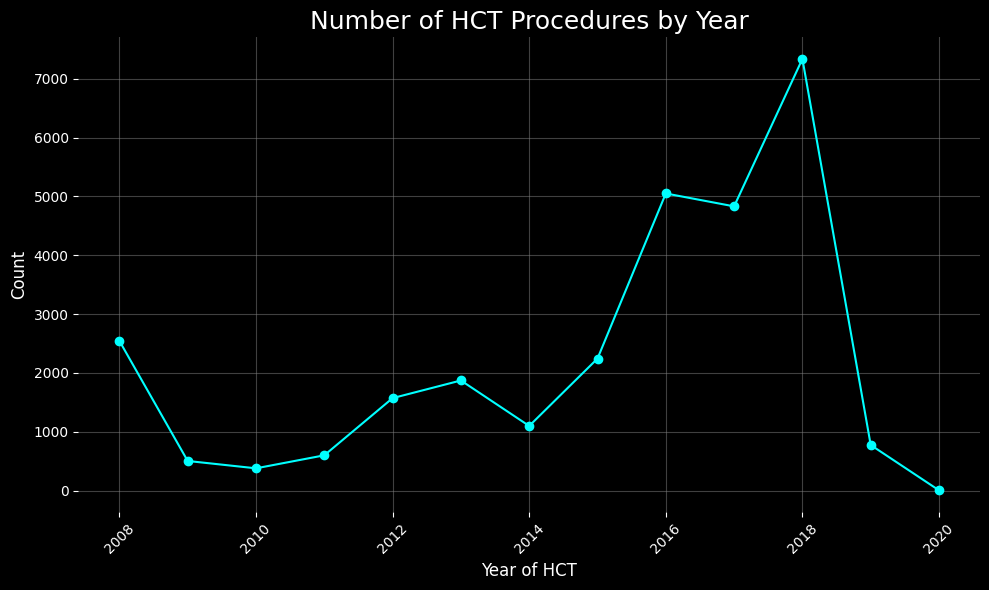

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('dark_background')

# Group the data by 'year_hct' and count procedures for each year.
year_counts = train.groupby('year_hct').size().reset_index(name='counts')
year_counts = year_counts.sort_values('year_hct')

fig, ax = plt.subplots(figsize=(10,6), facecolor='black')
ax.set_facecolor('black')

ax.plot(year_counts['year_hct'], year_counts['counts'], marker='o', linestyle='-', color='cyan')
ax.set_title('Number of HCT Procedures by Year', color='white', fontsize=18)
ax.set_xlabel('Year of HCT', color='white', fontsize=12)
ax.set_ylabel('Count', color='white', fontsize=12)
ax.tick_params(axis='both', colors='white')
ax.grid(True, color='gray', linestyle='-', alpha=0.5)

# Remove the outer spines
for spine in ax.spines.values():
    spine.set_visible(False)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Vergleich des EFS-Status (ereignisfreies Überleben) in Abhängigkeit vom Krankheitsrisikoindex

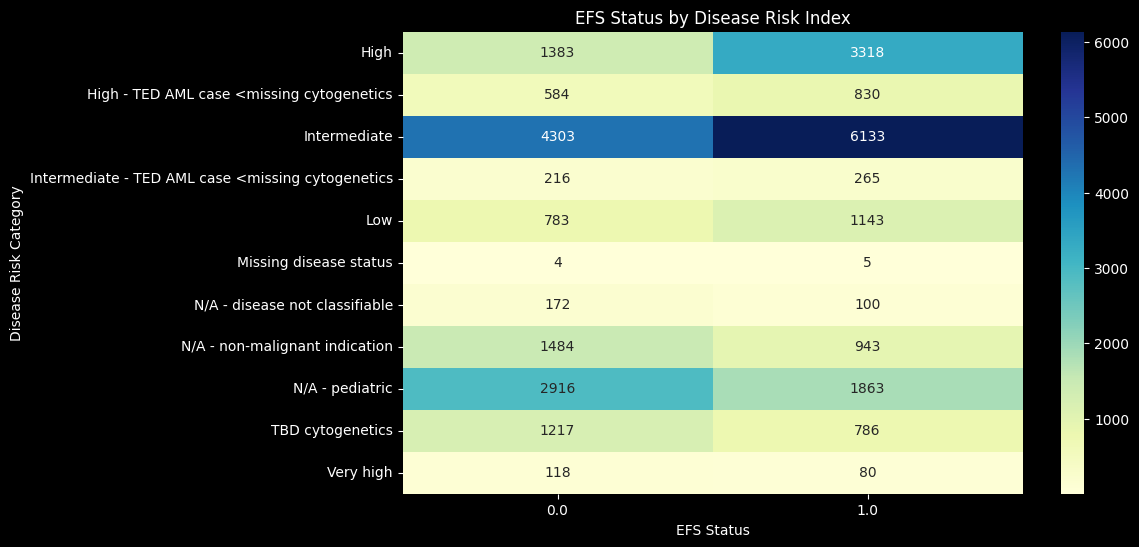

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

dri_efs = pd.crosstab(train['dri_score'], train['efs'])
plt.figure(figsize=(10,6))
sns.heatmap(dri_efs, annot=True, fmt='d', cmap='YlGnBu')
plt.title('EFS Status by Disease Risk Index')
plt.xlabel('EFS Status')
plt.ylabel('Disease Risk Category')
plt.show()

# Reißerische Grafiken

Beide Grafiken wurden mit Plotly erstellt und sind daher interaktiv, sodass Details durch Hover-Effekte und Zoomfunktionen erkundet werden können.

### Verteilung der Transplantattypen nach ethnischen Gruppen. (Reißerische Grafik)

In [25]:
import plotly.express as px
import pandas as pd

# Load actual data
train = pd.read_csv("/kaggle/input/equity-post-HCT-survival-predictions/train.csv")

# Ensure columns are treated as strings
train["graft_type"] = train["graft_type"].astype(str)
train["race_group"] = train["race_group"].astype(str)

def pie_chart_with_hue(df, column, hue, title):

    if column not in df.columns or hue not in df.columns:
        raise ValueError(f"Columns '{column}' and '{hue}' must exist in the DataFrame.")

    # Ensure the columns are strings to avoid categorical type errors
    df[column] = df[column].astype(str)
    df[hue] = df[hue].astype(str)

    # Grouping the data
    value_counts = df.groupby([hue, column]).size().reset_index(name='count')

    # Sunburst Chart for hierarchical visualization
    fig = px.sunburst(
        value_counts,
        path=[hue, column],  # Hierarchy: hue -> column
        values='count',
        color=hue,
        color_discrete_sequence=px.colors.qualitative.Set1,
        title=title
    )

    # Formatting hover template
    fig.update_traces(
        textinfo='label+percent parent',  # Show label and % of parent
        hovertemplate=(
            '<b>Category:</b> %{label}<br>'
            '<b>Count:</b> %{value:,}<br>'
            '<b>Percentage of Parent:</b> %{percentParent}<br>'
        )
    )

    # Adjust figure layout: Set black background and increase size
    fig.update_layout(
        paper_bgcolor="black",  # Outside background
        plot_bgcolor="black",   # Inside background
        font=dict(color="white"),  # White text for visibility
        title_font=dict(color="white", size=22),  # White title
        width=800,  # Custom width
        height=800  # Custom height
    )

    # Display the chart
    fig.show()

# Call the function with actual data
pie_chart_with_hue(train, column="graft_type", hue="race_group", title="Graft Type Distribution by Race Group")


Das Kreis-Diagramm zeigt die Verteilung der Transplantat-Typen ("Graft Type") aufgeteilt nach ethnischen Gruppen ("Race Group"). Die äußeren Ringe zeigen die spezifischen Transplantat-Typen innerhalb jeder ethnischen Gruppe an, während die inneren Kreise die Gesamtverteilung der ethnischen Gruppen darstellen. Das Diagramm verdeutlicht, wie unterschiedliche Transplantat-Typen über verschiedene ethnische Gruppen hinweg verteilt sind.

Das Diagramm zeigt deutlich, dass die Wahl des Transplantat-Typs stark von der ethnischen Zugehörigkeit beeinflusst wird. Dies könnte auf genetische, kulturelle oder sozioökonomische Faktoren zurückzuführen sein.

### Zusammenhang zwischen DRI Score und Event-Free Survival bei Patienten

In [26]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

train['efs'] = train['efs'].astype(str)
train['dri_score'] = train['dri_score'].astype(str)


# Funktion zur Extraktion eines ordinalen Risikowerts aus dem String
def extract_risk(dri):
    # Wichtig: "Very high" vor "High" prüfen, da "High" sonst auch in "Very high" vorkommen kann
    if "Very high" in dri:
        return 4
    elif "High" in dri:
        return 3
    elif "Intermediate" in dri:
        return 2
    elif "Low" in dri:
        return 1
    else:
        return np.nan

# Konvertiere EFS-Werte in numerische Form (0.0/1.0)
train['efs_numeric'] = pd.to_numeric(train['efs'], errors='coerce')

# Extrahiere den ordinalen DRI-Score
train['dri_extracted'] = train['dri_score'].apply(extract_risk)

# Mappe den extrahierten numerischen Wert in eine Kategoriebezeichnung
num_to_cat = {1: "Low", 2: "Intermediate", 3: "High", 4: "Very high"}
train['dri_category'] = train['dri_extracted'].map(num_to_cat)

# Gruppierung: Zähle die Anzahl der Patienten pro DRI-Kategorie und EFS-Status
value_counts = (
    train[train['dri_category'].notna()]
    .groupby(['dri_category', 'efs'])
    .size()
    .reset_index(name='count')
)

# Definierte Reihenfolge für die klaren Risikogruppen
order = ["Low", "Intermediate", "High", "Very high"]

# Erstelle das Balkendiagramm: 
# - x-Achse: DRI Score (als Kategorie)
# - y-Achse: Anzahl der Patienten, aufgeteilt nach EFS-Status
fig = px.bar(
    value_counts,
    x='dri_category',
    y='count',
    color='efs',
    barmode='group',
    category_orders={'dri_category': order},
    color_discrete_map={
        "0.0": "green",  # Event-Free
        "1.0": "red"     # Event
    },
    labels={
        "dri_category": "DRI Score",
        "count": "Anzahl der Patienten",
        "efs": "Event-Free Survival (0: Event-Free, 1: Event)"
    },
    title="DRI Score vs. Event-Free Survival"
)

# Für die Regression: Nutze nur Fälle mit einem klar extrahierten DRI‑Score
reg_data = train[train['dri_extracted'].notna() & train['efs_numeric'].notna()].copy()
if not reg_data.empty:
    x_reg = reg_data['dri_extracted'].astype(float)
    y_reg = reg_data['efs_numeric']
    
    # Berechne die lineare Regression: y = slope * x + intercept
    slope, intercept = np.polyfit(x_reg, y_reg, 1)
    
    # Für die Darstellung verwenden wir die vier Risikogruppen (1 bis 4)
    x_numeric = np.array([1, 2, 3, 4])
    y_pred = slope * x_numeric + intercept

    # Skalierung: Damit die gelbe Linie im Kontext der absoluten Patientenzahlen sichtbar wird
    scale_factor = value_counts['count'].max()
    y_pred_scaled = y_pred * scale_factor
    
    # Labels für die x-Achse
    x_labels = [num_to_cat[x] for x in x_numeric]
    
    # Füge die Regressionslinie als Scatter-Trace hinzu
    fig.add_trace(
        go.Scatter(
            x=x_labels,
            y=y_pred_scaled,
            mode='lines+markers',
            name='Korrelationslinie',
            line=dict(color="yellow", width=3),
            marker=dict(size=8)
        )
    )
    
    # Annotations: An jeder Stelle der gelben Linie wird der ursprüngliche (in Prozent umgerechnete) Regressionswert angezeigt.
    for xi, yi_scaled, yp in zip(x_labels, y_pred_scaled, y_pred):
        fig.add_annotation(
            x=xi,
            y=yi_scaled,
            text=f"{yp*100:.1f}%",
            showarrow=True,
            arrowhead=2,
            ax=0,
            ay=-20,
            font=dict(color="yellow", size=12)
        )
else:
    print("Warnung: Es wurden keine gültigen Daten für die Regression gefunden.")

# Layout-Anpassungen: Schwarzer Hintergrund, weiße Schrift
fig.update_layout(
    paper_bgcolor="black",
    plot_bgcolor="black",
    font=dict(color="white"),
    title_font=dict(color="white"),
    width=1000,
    height=600
)

fig.show()

Diese Visualisierung zeigt den Zusammenhang zwischen dem Disease Risk Index (DRI) und dem Event-Free Survival (EFS) bei Patienten. Die Balkendiagramme stellen die Anzahl der Patienten in den vier DRI-Risikogruppen ("Low", "Intermediate", "High", "Very high") dar, aufgeteilt nach ihrem EFS-Status ("Event-Free" in Grün, "Event" in Rot). Die gelbe Linie zeigt die Korrelation zwischen dem ordinalen DRI-Score und der Wahrscheinlichkeit eines Events, basierend auf einer linearen Regression. Das Diagramm gibt einen Überblick über die Risikoverteilung und hilft, potenzielle Zusammenhänge zwischen Risikogruppe und Überlebensstatus zu erkennen.

Die gelbe Regressionslinie zeigt, dass mit steigendem DRI-Score (von "Low" zu "Very high") die Wahrscheinlichkeit eines Events (Tod oder Komplikation) zunimmt.